# Importando Data y Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!wget -O "mpg.csv" "https://drive.google.com/uc?export=download&id=1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt"
mpg = pd.read_csv("mpg.csv")

display(mpg)

# 9 variables (columnas), 398 observaciones (filas)w
# el indice termine en 397 (porque el primer indice comienza en 0)


#Esto es un dataset sobre el performance en galones de combustible por milla de diferentes carros

#Attribute Information:

# mpg: continuous
# cylinders: multi-valued discrete
# displacement: continuous
# horsepower: continuous
# weight: continuous
# acceleration: continuous
# model year: multi-valued discrete
# origin: multi-valued discrete
# car name: string (unique for each instance)

--2023-04-12 04:06:58--  https://drive.google.com/uc?export=download&id=1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt
Resolving drive.google.com (drive.google.com)... 74.125.31.113, 74.125.31.139, 74.125.31.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qpuk293l5414thhfcde568a6cv7cs79p/1681272375000/06582550628056650937/*/1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt?e=download&uuid=10445e88-3ba7-44f7-8584-b65e05029daf [following]
--2023-04-12 04:06:58--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qpuk293l5414thhfcde568a6cv7cs79p/1681272375000/06582550628056650937/*/1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt?e=download&uuid=10445e88-3ba7-44f7-8584-b65e05029daf
Resolving doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# Limpiando Data


In [ ]:
#Revisando el tipo de datos
mpg.info()

# la variable "car name" esta como dato tipo object
# podriamos cambiarlo a category, porque es categorica nominal

# igualmente la variable "horse power", podriamos transformarla a int
# porque es una variable numerica discreta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


<Axes: >

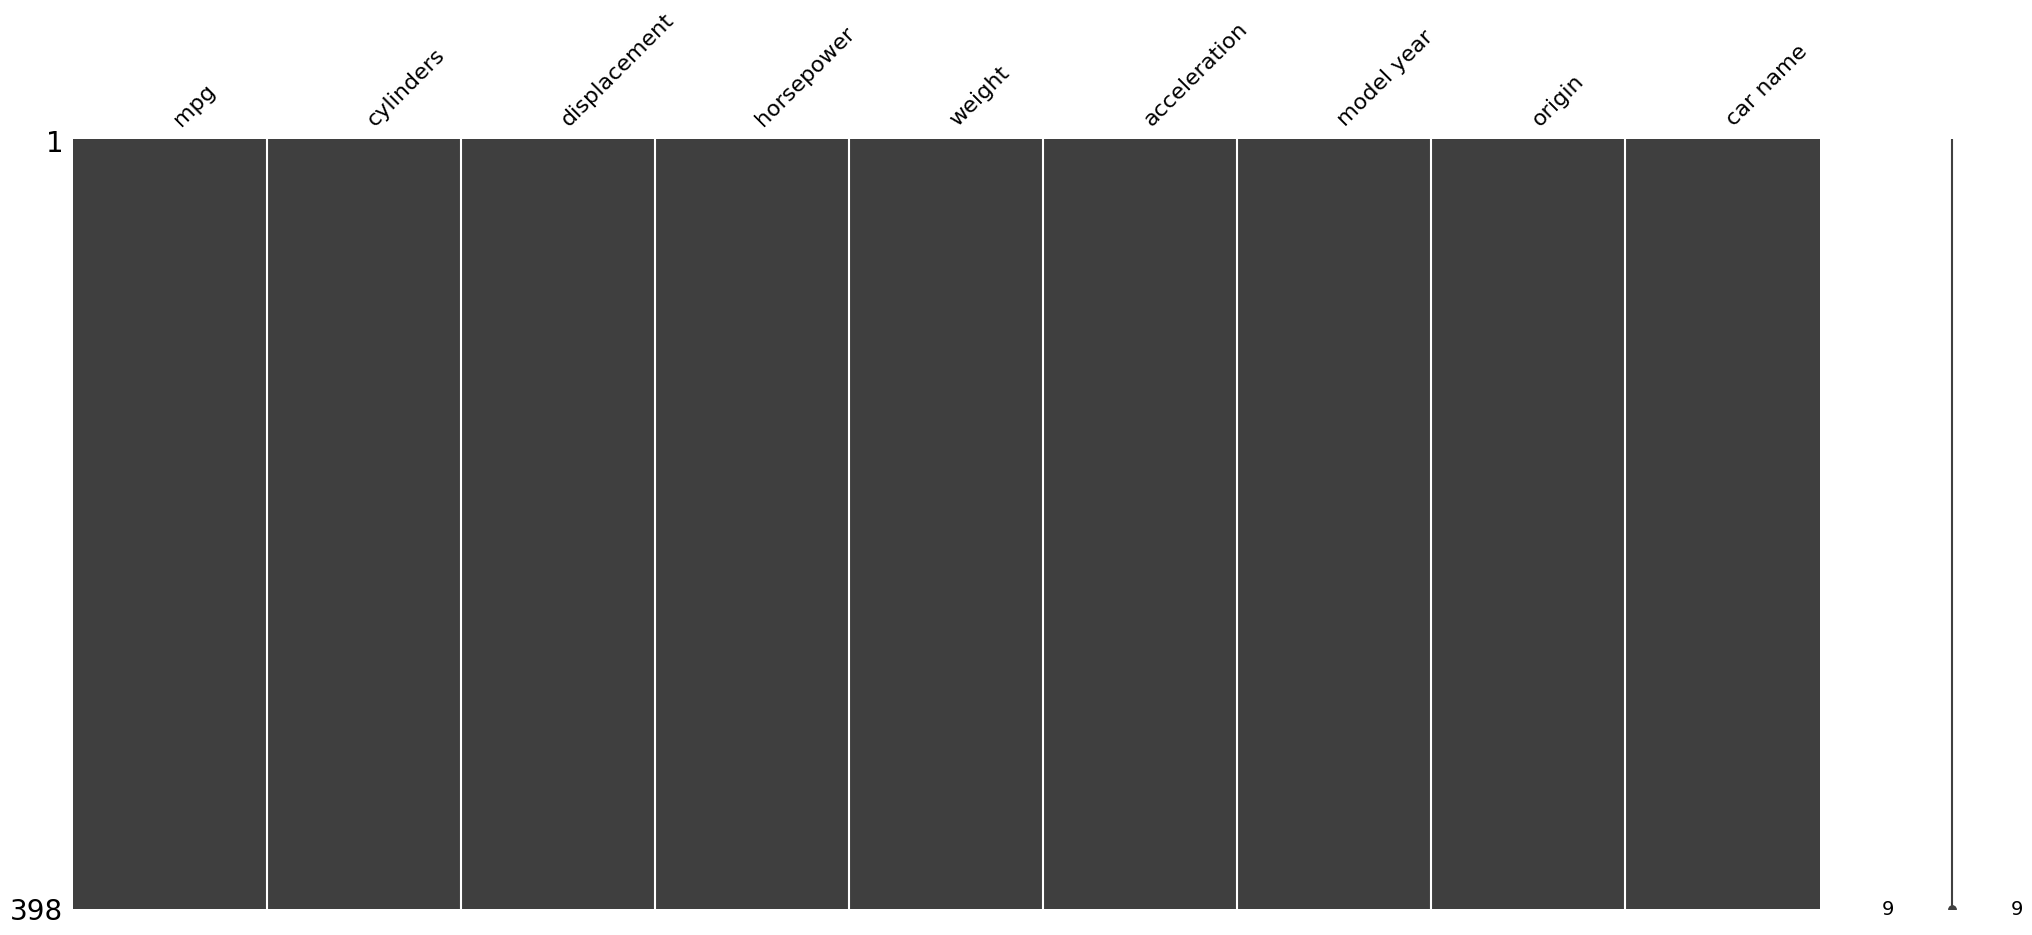

In [ ]:
# Visualizar presencia de NaN usando libreria missingno

import missingno as msno

msno.matrix(mpg)

#no parece haber ningun NaN, pero segun la informacion de kaggle
#donde descargue la data

#si deberian haber missing 6 values en la variable "horsepower"
#por alguna razon esto no lo esta detectando

In [ ]:
####~~~ESTE BLOQUE DE CODIGO CONTIENE UN ERROR, ENTONCES CORRER LINEA POR LINEA CON CTRL + SHIFT + ENTER~~~#######

# Buscar valores unicos y conteos de todas las variables
# intentar encontrar errores
# Revisar "horsepower" para intentar detectar los missing values

# para correr el loop con ctrl + shift + enter se tiene que resltar 
# todas lineas de codigo que forman el loop
# sino bota error de indentation, pero en realidad es problema del colab
# no de python
for i in range(len(mpg.columns)):
  print(mpg[mpg.columns[i]].value_counts())


#No se ve nada extranio a simple vista
#Pero hay muchos valores unicos por variable para darse cuenta


mpg["horsepower"].isnull().sum() #intentar sumar la cantidad de missing values

#no detecta nada.....

mpg["horsepower"].astype('int64') #intentar transformar el dtype: object a dtype: int64

#esto no funciona, retorna ValueError
#If you get a ValueError when trying to convert a Pandas Series object 
#from dtype ‘object’ to dtype ‘int64’,
#it means that there are non-numeric values in the Series. 

#Mas especifico el mensaje de error muestra: 

#ValueError: invalid literal for int() with base 10: '?'

#Mostrando que hay valores caracter "?" en la columna de "horsepower"

#Entonces hay que transformar la variable tipo object al tipo que les corresponde
#luego usar coercion y convertir esos caracteres en NaNs


pd.to_numeric(mpg["horsepower"], errors="coerce").isnull().sum()

# Transformando "horsepower" a numeric con coerce, aparecen 6 NaNs


mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

mpg.info()

# ahora "horsepower" es variable numerica tipo float64 
# Q: porque no int64? habia decimales?
# A: No necesariamente, la presencia de NaNs tampoco pueda representarse por integers
# por eso pd.to_numeric convierte "horsepower" a dtype: float64


# Hacer esto con todas las variables dtype: object y volver a plotear la matrix de msno

In [ ]:
#Crear una funcion iterativa para poner a prueba todas las variables numericas
#por presencia de valores no numericos, como hice con "horsepower"

def check_non_numeric(df, expected_numeric_columns):
    non_numeric_counts = df[expected_numeric_columns].applymap(lambda x: pd.isna(pd.to_numeric(x, errors='coerce'))).sum()
    non_numeric_counts = non_numeric_counts[non_numeric_counts > 0]
    return non_numeric_counts

#.applymap(), es un metodo aplicable a dataframes pandas
#este aplica la funcion que se le pasa como argumento a cada elemento del df

#lamba x: , permite definir funciones anonimas
#util para crear funciones simples sin usar def
#especialmente util junto applymap para definir rapidamente una funcion

#todas las variables son numericas excepto "car name"

expected_numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

#resetear la data para ver si detecta los "?" en "horsepower"


!wget -O "mpg.csv" "https://drive.google.com/uc?export=download&id=1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt"
mpg = pd.read_csv("mpg.csv")

#poner a prueba todas las variables numericas en busca valores no-numericos

non_numeric_counts = check_non_numeric(mpg, expected_numeric_columns)
print(non_numeric_counts)

# detecto exitosamente los 6 valores no numericos en "horsepower"
# no parece haber valores no numericos en el resto de columnas de variables numericas

#guardar la variable "horsepower" con sus valores no numericos transformados en NaNs

mpg["horsepower"] = pd.to_numeric(mpg["horsepower"], errors="coerce")

mpg.info() #horsepower ahora es float
# (puede pasar a int cuando elimine los NaNs)


--2023-04-12 04:07:36--  https://drive.google.com/uc?export=download&id=1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt
Resolving drive.google.com (drive.google.com)... 74.125.31.100, 74.125.31.138, 74.125.31.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7vp6e4au0datscu4kk5bjseokumlougd/1681272450000/06582550628056650937/*/1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt?e=download&uuid=df9edd2c-79f2-4dd9-8d26-626b48771cf4 [following]
--2023-04-12 04:07:36--  https://doc-08-88-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7vp6e4au0datscu4kk5bjseokumlougd/1681272450000/06582550628056650937/*/1VZOKUL2H87jUKvi7rjPfKY0WXa5HxvCt?e=download&uuid=df9edd2c-79f2-4dd9-8d26-626b48771cf4
Resolving doc-08-88-docs.googleusercontent.com (doc-08-88-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b

In [ ]:
#Transformando "car name" a nominal category (dtype: object ---> dtype: category)

display(pd.DataFrame(mpg["car name"].value_counts()))

# Se puede ver que la mayoria de nombres de carros son unicos
# hay 305 nombres unicos para 398 entries en el dataframe 
# los que mas se repiten no pasen de 6 repitaciones
# ford pinto (6), toyota corolla (5), amc matador (5), ford maverick (5)
# Es dificil revisar todos los nombres por errores 
# o strings distintos para el mismo modelo de carro
# Pero revisando rapidamente no se ven errores grandes/obvios, 
# aunque la nomenclatura para los modelos de carro no se ve muy ordenada

mpg["car name"] = pd.Categorical(mpg["car name"])



mpg.info()

#ahora car name es category


,car name
ford pinto,6
toyota corolla,5
amc matador,5
ford maverick,5
chevrolet chevette,4
...,...
chevrolet monza 2+2,1
ford mustang ii,1
pontiac astro,1
amc pacer,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   car name      398 non-null    category
dtypes: category(1), float64(4), int64(4)
memory usage: 36.3 KB


#Visualización

In [ ]:
display(mpg)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
# Se muestran los valores únicos por cada variable para determinar de que modo podríamos agrupar la base
for i in range(len(mpg.columns)):
   var=mpg.columns[i]
   print("\n",mpg[[var]].value_counts())


 mpg 
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
26.4     1
25.8     1
25.1     1
24.3     1
46.6     1
Length: 129, dtype: int64

 cylinders
4            204
8            103
6             84
3              4
5              3
dtype: int64

 displacement
97.0            21
350.0           18
98.0            18
250.0           17
318.0           17
                ..
130.0            1
171.0            1
131.0            1
155.0            1
68.0             1
Length: 82, dtype: int64

 horsepower
150.0         22
90.0          20
88.0          19
110.0         18
100.0         17
              ..
132.0          1
133.0          1
135.0          1
137.0          1
230.0          1
Length: 93, dtype: int64

 weight
2130      4
1985      4
2720      3
2300      3
2265      3
         ..
2592      1
2587      1
2585      1
2582      1
5140      1
Length: 351, dtype: int64

 acceleration
14.5            23
15.5            21
14.0            16
16.0            16
13.5

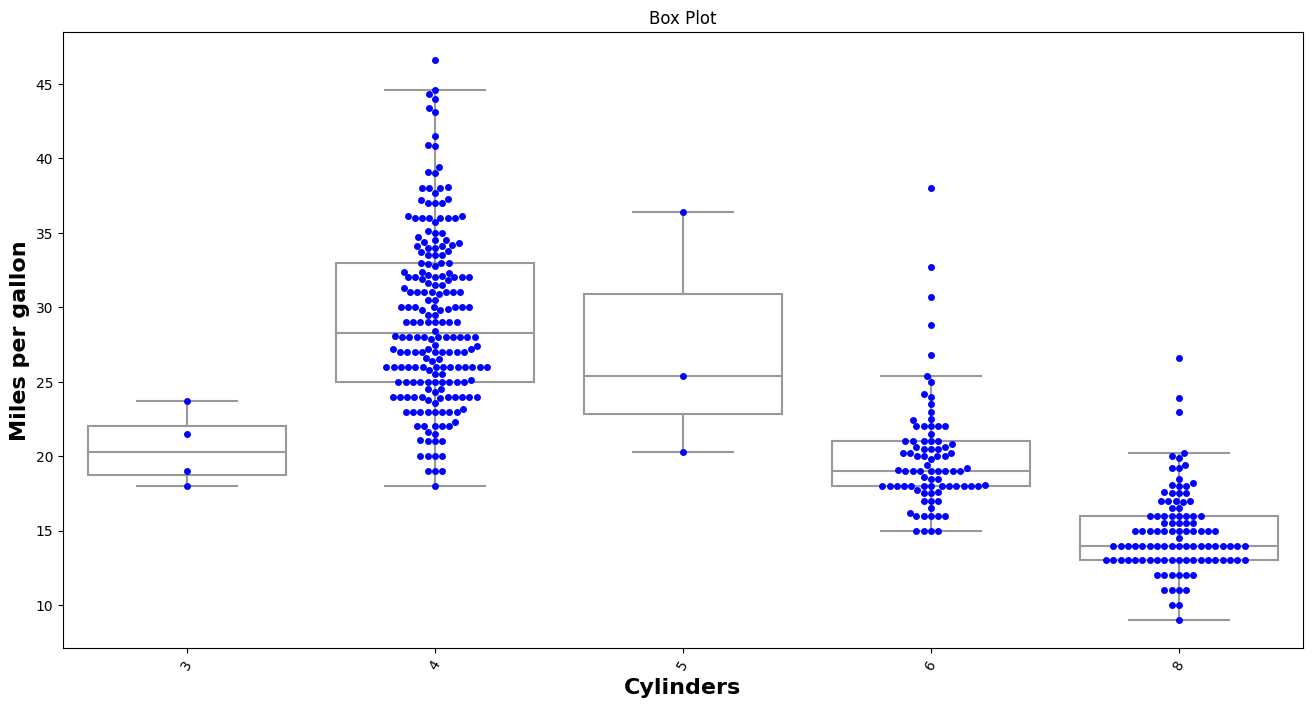

In [ ]:
fig1 = plt.figure(figsize=(16, 8))

###
ax = sns.boxplot(x='cylinders', y='mpg', data=mpg, ax=fig1.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='cylinders', y='mpg', data=mpg, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Cylinders', fontsize=16, fontweight='bold')
plt.ylabel('Miles per gallon', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show()

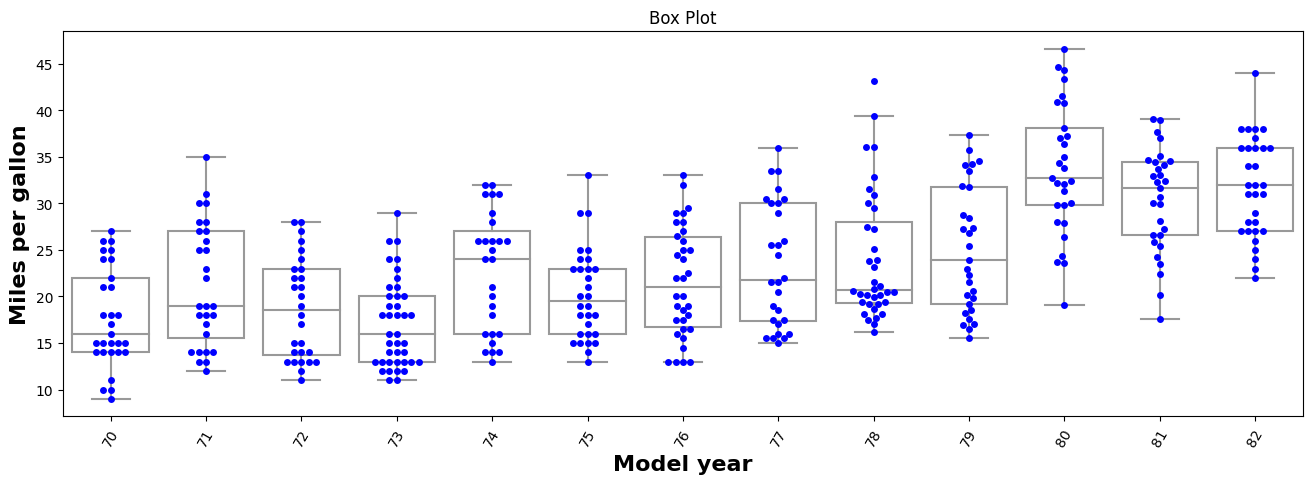

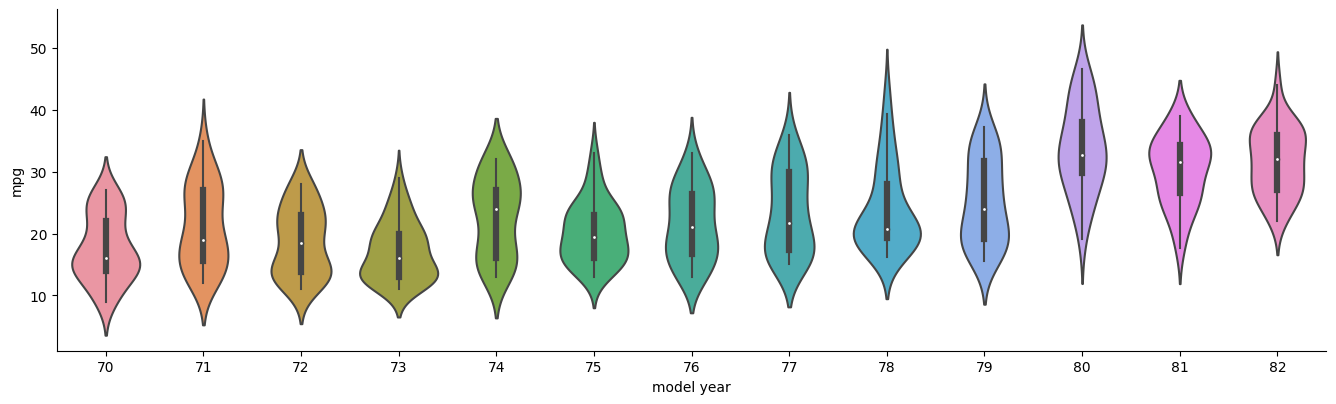

In [ ]:

#Para model year:

fig2 = plt.figure(figsize=(16, 5))
###
ax = sns.boxplot(x='model year', y='mpg', data=mpg, ax=fig2.add_subplot(1,1,1), showfliers=False, color='white')
sns.swarmplot(x='model year', y='mpg', data=mpg, ax=ax, color='blue', size=5)
###

# Rotar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

# Agregar título de gráfica y etiquetas de eje
plt.title('Box Plot')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel('Model year', fontsize=16, fontweight='bold')
plt.ylabel('Miles per gallon', rotation=90, fontsize=16, fontweight='bold')

# Mostrar la gráfica
plt.show()


#Como la distribución no es clara, reploteamos con un tipo de gráfico distinto
catP_my=sns.catplot(x = "model year", y = "mpg", data = mpg, kind = "violin")
catP_my.fig.set_size_inches(15, 4)
plt.show();


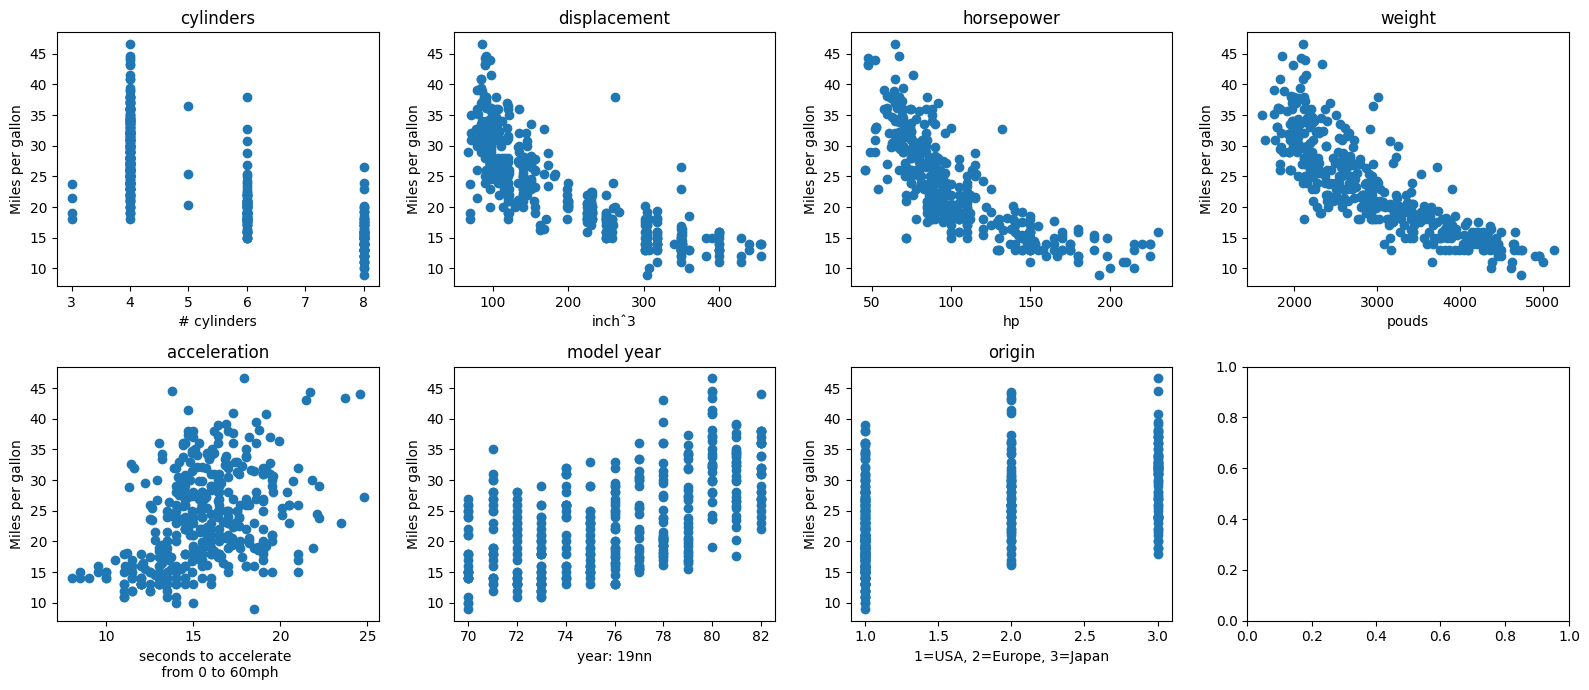

In [ ]:
#Se incluyen scatterplots de cada variable con millas por galón
# Set up the figure and axes
row=2
col=4

setC=[list(mpg.columns)[1:5], list(mpg.columns)[5:8]]
setUnit=[["# cylinders", "inchˆ3", "hp", "pouds"],["seconds to accelerate \n from 0 to 60mph", "year: 19nn", "1=USA, 2=Europe, 3=Japan"]]
fig, axes = plt.subplots(row,col, figsize=(16, 7))  # Adjust the figure size as needed

# Loop through the columns and create histograms
for i in range(row):
  for j in range (col):
      if (i==row-1) and (j==col-1):
        pass
      else:

        ax=axes[i][j]
        
        # Create histogram 
        ax.scatter(mpg[setC[i][j]],mpg["mpg"])
        
        # Set title and labels for the current axis
        ax.set_title(setC[i][j])
        ax.set_xlabel(setUnit[i][j])
        ax.set_ylabel('Miles per gallon')
      
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#Modelo de regresión lineal

In [ ]:
from scipy import stats
mpg.corr()

<ipython-input-30-ec5c48ffe49a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


<ipython-input-31-a121251ec7d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mpg.corr(), annot=True, vmin=-1, vmax=1, cmap="Blues") #Pearson


<Axes: >

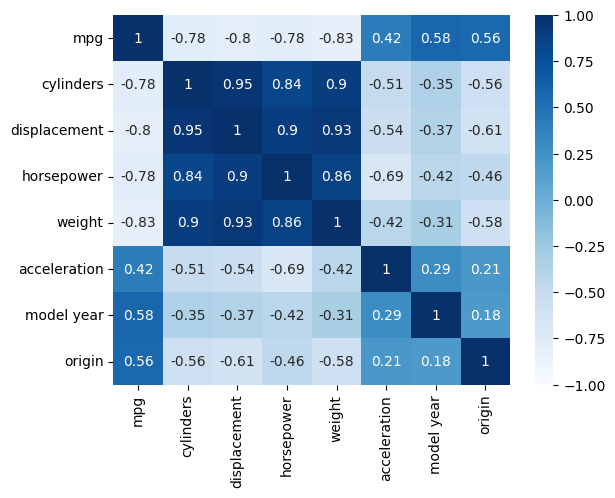

In [ ]:
sns.heatmap(mpg.corr(), annot=True, vmin=-1, vmax=1, cmap="Blues") #Pearson

In [ ]:
#modelando engine displacement vs miles per gallon
#escogimos displacement porque tiene una alta correlacion negativa -0.8 
# que tmb se observa en el scatterplot de displacement vs mpg

x_col=mpg["displacement"]
y_col=mpg["mpg"]

In [ ]:
stats.spearmanr(x_col,y_col)

SignificanceResult(statistic=-0.8556920118178749, pvalue=2.3646353779685863e-115)

In [ ]:
stats.pearsonr(x_col,y_col)# para tendencia lineal

PearsonRResult(statistic=-0.8042028248058978, pvalue=1.6558889101929443e-91)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = x_col.to_numpy()
y = y_col.to_numpy()

In [ ]:
X

array([307. , 350. , 318. , 304. , 302. , 429. , 454. , 440. , 455. ,
       390. , 383. , 340. , 400. , 455. , 113. , 198. , 199. , 200. ,
        97. ,  97. , 110. , 107. , 104. , 121. , 199. , 360. , 307. ,
       318. , 304. ,  97. , 140. , 113. ,  98. , 232. , 225. , 250. ,
       250. , 232. , 350. , 400. , 351. , 318. , 383. , 400. , 400. ,
       258. , 140. , 250. , 250. , 122. , 116. ,  79. ,  88. ,  71. ,
        72. ,  97. ,  91. , 113. ,  97.5,  97. , 140. , 122. , 350. ,
       400. , 318. , 351. , 304. , 429. , 350. , 350. , 400. ,  70. ,
       304. , 307. , 302. , 318. , 121. , 121. , 120. ,  96. , 122. ,
        97. , 120. ,  98. ,  97. , 350. , 304. , 350. , 302. , 318. ,
       429. , 400. , 351. , 318. , 440. , 455. , 360. , 225. , 250. ,
       232. , 250. , 198. ,  97. , 400. , 400. , 360. , 350. , 232. ,
        97. , 140. , 108. ,  70. , 122. , 155. ,  98. , 350. , 400. ,
        68. , 116. , 114. , 121. , 318. , 121. , 156. , 350. , 198. ,
       200. , 232. ,

In [ ]:
X.shape, y.shape

((398,), (398,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47, test_size = 0.33) #para dividir aleatoriamente la data

In [ ]:
y_train.shape, y_test.shape

((266,), (132,))

In [ ]:
X_train.shape, X_test.shape

((266,), (132,))

In [ ]:
X_train

array([350., 258., 400., 302., 250., 122., 360., 151., 351., 383., 360.,
       440., 258., 318., 135., 156., 231., 199.,  83., 455., 351., 302.,
       307., 141., 262., 304.,  98.,  79.,  89., 200., 151., 390., 250.,
        89., 104., 231., 122., 131., 225., 307., 122., 121.,  90., 304.,
        97.,  90.,  81.,  91., 351., 120., 134., 120.,  91.,  85.,  91.,
        79.,  97., 121., 120.,  97., 225.,  91., 112.,  98., 140., 111.,
       440., 120., 350., 231., 232., 140., 260., 250., 400., 304., 250.,
       225.,  78., 429., 121., 163., 113.,  91.,  97.,  91., 340., 146.,
       135.,  86., 350., 146., 200., 120.,  98., 350., 318.,  68., 305.,
       112., 173., 119., 225., 199., 105., 351.,  97., 181., 108., 232.,
        90.,  97., 232., 108.,  70.,  72., 156., 200.,  98., 350., 140.,
       232., 171.,  90., 151., 305., 302.,  97., 151., 302.,  97.,  89.,
       112., 400., 250., 156.,  91., 400., 225., 105., 400., 134., 120.,
       108.,  79.,  86., 318., 151.,  85., 101.,  9

In [ ]:
lmodel = LinearRegression()
lmodel.fit(X_train.reshape(-1,1), y_train) 

LinearRegression()

In [ ]:
y_pred = lmodel.predict(X_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred) #

0.591321889930508

In [ ]:
m = lmodel.coef_

In [ ]:
b = lmodel.intercept_

In [ ]:
y_l = m*X_test +b

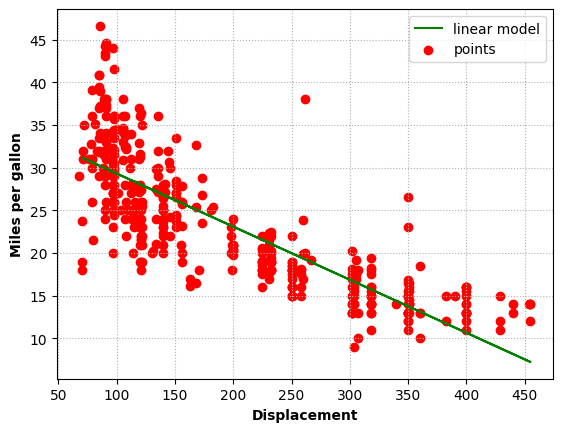

In [ ]:
plt.plot(X_test, y_l, color="green", label="linear model")
plt.scatter(X,y, color="red", label="points")
plt.xlabel('Displacement', fontsize=10, fontweight='bold')
plt.ylabel('Miles per gallon', rotation=90, fontsize=10, fontweight='bold')
plt.legend()
plt.grid(linestyle = ":")


# Regresión lineal múltiple

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl

In [ ]:
from sklearn import linear_model
mpg.rename(columns={"model year": "model_year"}, inplace=True) #Se cambio el nombre de la columna para que pueda ser reconocido por la funcion smf.ols

formula_str='mpg ~ '
for name_var in mpg.columns:
  formula_str=formula_str+name_var+' + '
formula_str=formula_str[:-14]
formula_str=formula_str.replace('mpg +', '')

linear_regression = smf.ols(formula = formula_str,data=mpg)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.04e-139
Time:                        04:08:21   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
model_year       0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

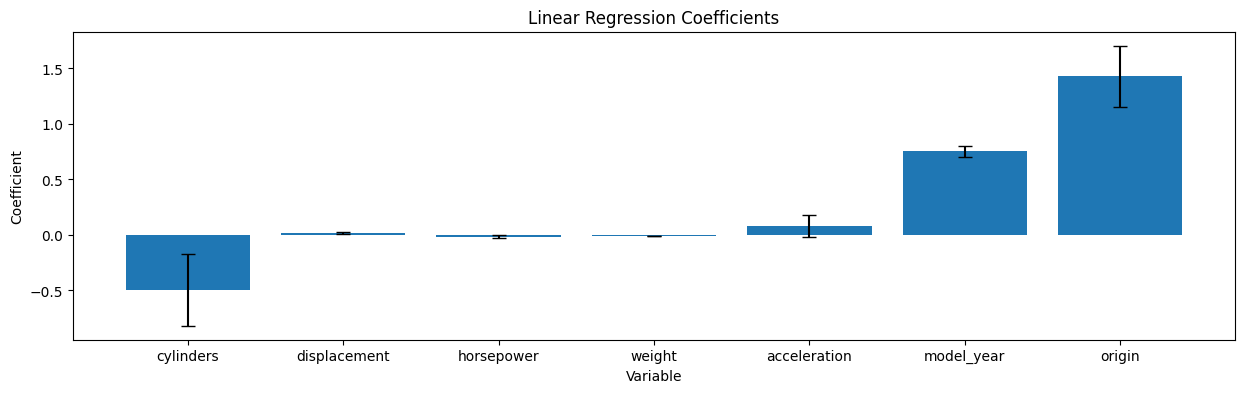

In [ ]:
coef = fitted_model.params[1:]
std_err = fitted_model.bse[1:]

# Create the plot
fig, ax = plt.subplots(figsize=(15,4))
ax.bar(x=coef.index, height=coef.values, yerr=std_err.values, capsize=5)
ax.set_xlabel('Variable')
ax.set_ylabel('Coefficient')
ax.set_title('Linear Regression Coefficients')
plt.show()

<ipython-input-54-a121251ec7d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mpg.corr(), annot=True, vmin=-1, vmax=1, cmap="Blues") #Pearson


<Axes: >

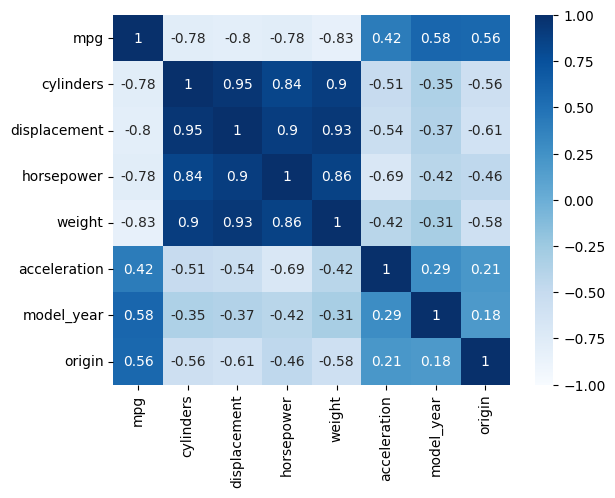

In [ ]:
sns.heatmap(mpg.corr(), annot=True, vmin=-1, vmax=1, cmap="Blues") #Pearson

#Hay una alta colinearidad entre las variables cylinders, displacement, horsepower and weight.
#esto puede explicar porque estas variables tienen altas correlaciones de Pearson con mpg,
#ademas de aparentes tendencias en los scatter plots, pero luego sus coeficiente en el modelo
#de regresion multiple se muestran muy pequenos o insignificantes.

#Se tendria que solucionar esta colinearidad, ya sea manteniendo solo una de estas variables y retirando el resto
#o algun otro metodo mas sofisticado (PCA?, Ridge regression?, Lasso regression?)
# para ridge regression y lasso regression tienen que ser escalados necesariamente